## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
from tensorflow import keras
import itertools
# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape,output_nuit=10,num_neurons=[512,256,128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i==0:
            x = keras.layers.Dense(units=n_units,activation="relu",name="hidden"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units,activation="relu",name="hidden"+str(i+1))(x)
    out =  keras.layers.Dense(units=output_nuit,activation="softmax",name="out")(x)
    
    model = keras.models.Model(inputs=[input_layer],outputs=[out])
    
    
    return model

In [6]:
LEARNING_RATE = [1e-1,1e-2,1e-3,1e-4,1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.85,0.99]

In [7]:
results = {}

for lr, momentum in itertools.product(LEARNING_RATE, MOMENTUM):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f Momentum = %.2f" % (lr,momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000 Momentum = 0.85
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
hidden2 (Dense)              (None, 256)               131328    
_________________________________________________________________
hidden3 (Dense)              (None, 128)               32896     
_________________________________________________________________
out (Dense)                  (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


C:\Users\loe_lin\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
196/196 [==============================] - 3s 12ms/step - loss: 2.1824 - accuracy: 0.1830 - val_loss: 2.1905 - val_accuracy: 0.1731
Epoch 2/50
196/196 [==============================] - 2s 11ms/step - loss: 2.0542 - accuracy: 0.2367 - val_loss: 1.8906 - val_accuracy: 0.3066
Epoch 3/50
196/196 [==============================] - 3s 14ms/step - loss: 1.9446 - accuracy: 0.2856 - val_loss: 2.0040 - val_accuracy: 0.2741
Epoch 4/50
196/196 [==============================] - 2s 12ms/step - loss: 1.8179 - accuracy: 0.3453 - val_loss: 1.9526 - val_accuracy: 0.3101
Epoch 5/50
196/196 [==============================] - 2s 11ms/step - loss: 1.7497 - accuracy: 0.3695 - val_loss: 1.8315 - val_accuracy: 0.3376
Epoch 6/50
196/196 [==============================] - 2s 11ms/step - loss: 1.7032 - accuracy: 0.3894 - val_loss: 1.6793 - val_accuracy: 0.3889
Epoch 7/50
196/196 [==============================] - 2s 12ms/step - loss: 1.6521 - accuracy: 0.4064 - val_loss: 1.6690 - val_accuracy: 0.4010

Epoch 1/50
196/196 [==============================] - 2s 12ms/step - loss: 5776.2803 - accuracy: 0.0994 - val_loss: 2.3143 - val_accuracy: 0.1000
Epoch 2/50
196/196 [==============================] - 2s 11ms/step - loss: 2.3090 - accuracy: 0.1010 - val_loss: 2.3066 - val_accuracy: 0.1000
Epoch 3/50
196/196 [==============================] - 2s 11ms/step - loss: 2.3071 - accuracy: 0.0998 - val_loss: 2.3054 - val_accuracy: 0.1000
Epoch 4/50
196/196 [==============================] - 2s 11ms/step - loss: 2.3075 - accuracy: 0.1004 - val_loss: 2.3074 - val_accuracy: 0.1000
Epoch 5/50
196/196 [==============================] - 2s 11ms/step - loss: 2.3082 - accuracy: 0.1011 - val_loss: 2.3060 - val_accuracy: 0.1000
Epoch 6/50
196/196 [==============================] - 2s 11ms/step - loss: 2.3073 - accuracy: 0.1010 - val_loss: 2.3070 - val_accuracy: 0.1000
Epoch 7/50
196/196 [==============================] - 2s 11ms/step - loss: 2.3078 - accuracy: 0.0990 - val_loss: 2.3089 - val_accuracy: 0.1

Epoch 1/50
196/196 [==============================] - 2s 11ms/step - loss: 1.9060 - accuracy: 0.3193 - val_loss: 1.7838 - val_accuracy: 0.3735
Epoch 2/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6934 - accuracy: 0.4026 - val_loss: 1.7095 - val_accuracy: 0.3841
Epoch 3/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6010 - accuracy: 0.4352 - val_loss: 1.6036 - val_accuracy: 0.4299
Epoch 4/50
196/196 [==============================] - 2s 11ms/step - loss: 1.5421 - accuracy: 0.4560 - val_loss: 1.5948 - val_accuracy: 0.4265
Epoch 5/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4902 - accuracy: 0.4739 - val_loss: 1.5496 - val_accuracy: 0.4526
Epoch 6/50
196/196 [==============================] - 2s 12ms/step - loss: 1.4479 - accuracy: 0.4882 - val_loss: 1.5439 - val_accuracy: 0.4504
Epoch 7/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4133 - accuracy: 0.5007 - val_loss: 1.5342 - val_accuracy: 0.4575

Epoch 1/50
196/196 [==============================] - 2s 11ms/step - loss: 1.8375 - accuracy: 0.3403 - val_loss: 1.6656 - val_accuracy: 0.4024
Epoch 2/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5889 - accuracy: 0.4366 - val_loss: 1.5461 - val_accuracy: 0.4493
Epoch 3/50
196/196 [==============================] - 2s 11ms/step - loss: 1.5077 - accuracy: 0.4626 - val_loss: 1.5311 - val_accuracy: 0.4522
Epoch 4/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4713 - accuracy: 0.4765 - val_loss: 1.5051 - val_accuracy: 0.4644
Epoch 5/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4240 - accuracy: 0.4912 - val_loss: 1.4940 - val_accuracy: 0.4637
Epoch 6/50
196/196 [==============================] - 2s 11ms/step - loss: 1.3881 - accuracy: 0.5024 - val_loss: 1.4517 - val_accuracy: 0.4847
Epoch 7/50
196/196 [==============================] - 2s 11ms/step - loss: 1.3633 - accuracy: 0.5123 - val_loss: 1.4695 - val_accuracy: 0.4785

Epoch 1/50
196/196 [==============================] - 3s 13ms/step - loss: 2.1283 - accuracy: 0.2478 - val_loss: 1.9919 - val_accuracy: 0.3095
Epoch 2/50
196/196 [==============================] - 2s 11ms/step - loss: 1.9312 - accuracy: 0.3292 - val_loss: 1.8771 - val_accuracy: 0.3482
Epoch 3/50
196/196 [==============================] - 2s 11ms/step - loss: 1.8485 - accuracy: 0.3550 - val_loss: 1.8265 - val_accuracy: 0.3540
Epoch 4/50
196/196 [==============================] - 2s 11ms/step - loss: 1.7988 - accuracy: 0.3731 - val_loss: 1.7826 - val_accuracy: 0.3802
Epoch 5/50
196/196 [==============================] - 2s 11ms/step - loss: 1.7610 - accuracy: 0.3868 - val_loss: 1.7552 - val_accuracy: 0.3800
Epoch 6/50
196/196 [==============================] - 2s 11ms/step - loss: 1.7296 - accuracy: 0.3984 - val_loss: 1.7161 - val_accuracy: 0.4018
Epoch 7/50
196/196 [==============================] - 2s 11ms/step - loss: 1.7029 - accuracy: 0.4069 - val_loss: 1.6938 - val_accuracy: 0.4103

Epoch 1/50
196/196 [==============================] - 2s 11ms/step - loss: 1.9990 - accuracy: 0.2804 - val_loss: 1.8240 - val_accuracy: 0.3589
Epoch 2/50
196/196 [==============================] - 2s 11ms/step - loss: 1.7413 - accuracy: 0.3857 - val_loss: 1.6702 - val_accuracy: 0.4142
Epoch 3/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6194 - accuracy: 0.4288 - val_loss: 1.5820 - val_accuracy: 0.4425
Epoch 4/50
196/196 [==============================] - 2s 11ms/step - loss: 1.5352 - accuracy: 0.4595 - val_loss: 1.5277 - val_accuracy: 0.4568
Epoch 5/50
196/196 [==============================] - 2s 12ms/step - loss: 1.4754 - accuracy: 0.4791 - val_loss: 1.4717 - val_accuracy: 0.4728
Epoch 6/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4205 - accuracy: 0.4974 - val_loss: 1.4653 - val_accuracy: 0.4767
Epoch 7/50
196/196 [==============================] - 2s 11ms/step - loss: 1.3816 - accuracy: 0.5115 - val_loss: 1.4326 - val_accuracy: 0.4886

Epoch 1/50
196/196 [==============================] - 3s 12ms/step - loss: 2.3011 - accuracy: 0.1398 - val_loss: 2.2643 - val_accuracy: 0.1661
Epoch 2/50
196/196 [==============================] - 3s 13ms/step - loss: 2.2447 - accuracy: 0.1823 - val_loss: 2.2268 - val_accuracy: 0.1875
Epoch 3/50
196/196 [==============================] - 3s 13ms/step - loss: 2.2093 - accuracy: 0.2025 - val_loss: 2.1934 - val_accuracy: 0.2119
Epoch 4/50
196/196 [==============================] - 2s 11ms/step - loss: 2.1772 - accuracy: 0.2206 - val_loss: 2.1632 - val_accuracy: 0.2264
Epoch 5/50
196/196 [==============================] - 2s 11ms/step - loss: 2.1476 - accuracy: 0.2328 - val_loss: 2.1343 - val_accuracy: 0.2435
Epoch 6/50
196/196 [==============================] - 3s 14ms/step - loss: 2.1184 - accuracy: 0.2496 - val_loss: 2.1048 - val_accuracy: 0.2495
Epoch 7/50
196/196 [==============================] - 2s 11ms/step - loss: 2.0912 - accuracy: 0.2594 - val_loss: 2.0793 - val_accuracy: 0.2643

Epoch 1/50
196/196 [==============================] - 3s 15ms/step - loss: 2.2069 - accuracy: 0.1966 - val_loss: 2.0684 - val_accuracy: 0.2630
Epoch 2/50
196/196 [==============================] - 3s 14ms/step - loss: 1.9801 - accuracy: 0.2964 - val_loss: 1.9183 - val_accuracy: 0.3193
Epoch 3/50
196/196 [==============================] - 3s 15ms/step - loss: 1.8742 - accuracy: 0.3363 - val_loss: 1.8417 - val_accuracy: 0.3536
Epoch 4/50
196/196 [==============================] - 3s 15ms/step - loss: 1.8141 - accuracy: 0.3635 - val_loss: 1.7949 - val_accuracy: 0.3667
Epoch 5/50
196/196 [==============================] - 3s 15ms/step - loss: 1.7720 - accuracy: 0.3778 - val_loss: 1.7546 - val_accuracy: 0.3882
Epoch 6/50
196/196 [==============================] - 3s 14ms/step - loss: 1.7359 - accuracy: 0.3928 - val_loss: 1.7218 - val_accuracy: 0.3974
Epoch 7/50
196/196 [==============================] - 3s 14ms/step - loss: 1.7040 - accuracy: 0.4052 - val_loss: 1.6935 - val_accuracy: 0.4042

Epoch 1/50
196/196 [==============================] - 3s 12ms/step - loss: 2.4183 - accuracy: 0.1029 - val_loss: 2.3685 - val_accuracy: 0.1097
Epoch 2/50
196/196 [==============================] - 2s 11ms/step - loss: 2.3420 - accuracy: 0.1171 - val_loss: 2.3197 - val_accuracy: 0.1263
Epoch 3/50
196/196 [==============================] - 2s 11ms/step - loss: 2.3075 - accuracy: 0.1319 - val_loss: 2.2955 - val_accuracy: 0.1385
Epoch 4/50
196/196 [==============================] - 2s 12ms/step - loss: 2.2891 - accuracy: 0.1444 - val_loss: 2.2813 - val_accuracy: 0.1517
Epoch 5/50
196/196 [==============================] - 2s 11ms/step - loss: 2.2775 - accuracy: 0.1589 - val_loss: 2.2716 - val_accuracy: 0.1703
Epoch 6/50
196/196 [==============================] - 2s 11ms/step - loss: 2.2691 - accuracy: 0.1730 - val_loss: 2.2641 - val_accuracy: 0.1810
Epoch 7/50
196/196 [==============================] - 2s 11ms/step - loss: 2.2623 - accuracy: 0.1818 - val_loss: 2.2578 - val_accuracy: 0.1875

Epoch 1/50
196/196 [==============================] - 3s 13ms/step - loss: 2.3096 - accuracy: 0.1158 - val_loss: 2.2606 - val_accuracy: 0.1372
Epoch 2/50
196/196 [==============================] - 2s 11ms/step - loss: 2.2291 - accuracy: 0.1867 - val_loss: 2.1963 - val_accuracy: 0.2198
Epoch 3/50
196/196 [==============================] - 2s 11ms/step - loss: 2.1740 - accuracy: 0.2285 - val_loss: 2.1471 - val_accuracy: 0.2432
Epoch 4/50
196/196 [==============================] - 2s 12ms/step - loss: 2.1294 - accuracy: 0.2512 - val_loss: 2.1054 - val_accuracy: 0.2615
Epoch 5/50
196/196 [==============================] - 2s 11ms/step - loss: 2.0907 - accuracy: 0.2680 - val_loss: 2.0689 - val_accuracy: 0.2755
Epoch 6/50
196/196 [==============================] - 2s 11ms/step - loss: 2.0565 - accuracy: 0.2776 - val_loss: 2.0369 - val_accuracy: 0.2890
Epoch 7/50
196/196 [==============================] - 2s 11ms/step - loss: 2.0265 - accuracy: 0.2888 - val_loss: 2.0090 - val_accuracy: 0.3020

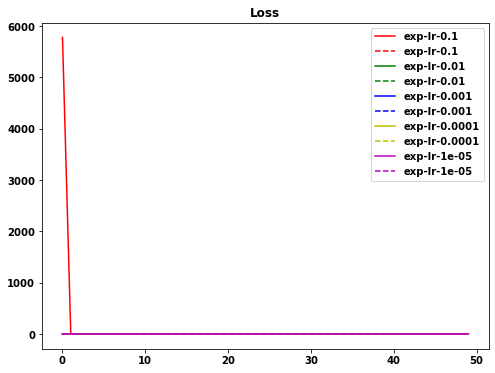

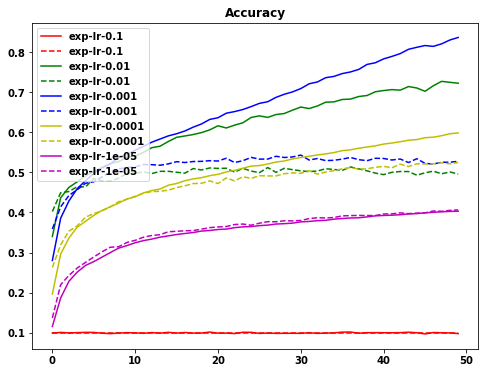

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()